#Model Development

We have discussed several Exploratory Data Analysis (EDA) techniques so far. The reason we performed EDA was to prepare our dataset and make sense of it so that it can be used for predictive and analytical purposes. By predictive and analytical, we mean to create and evaluate Machine Learning (ML) models.

Now we are going to cover the following topics:
* Types of Machine Learning 
* Understanding supervised Learning
* Understanding unsupervised learning 
* Understanding reinforcement learning 
* Unified machine learning workflow

##Types of machine learning
Machine learning (ML) is a field of computer science that deals with the creation of algorithms that can discover patterns by themselves without being explicitly programmed. There are different types of ML algorithms, and these are categorized into three different categories, as shown in the following diagram:

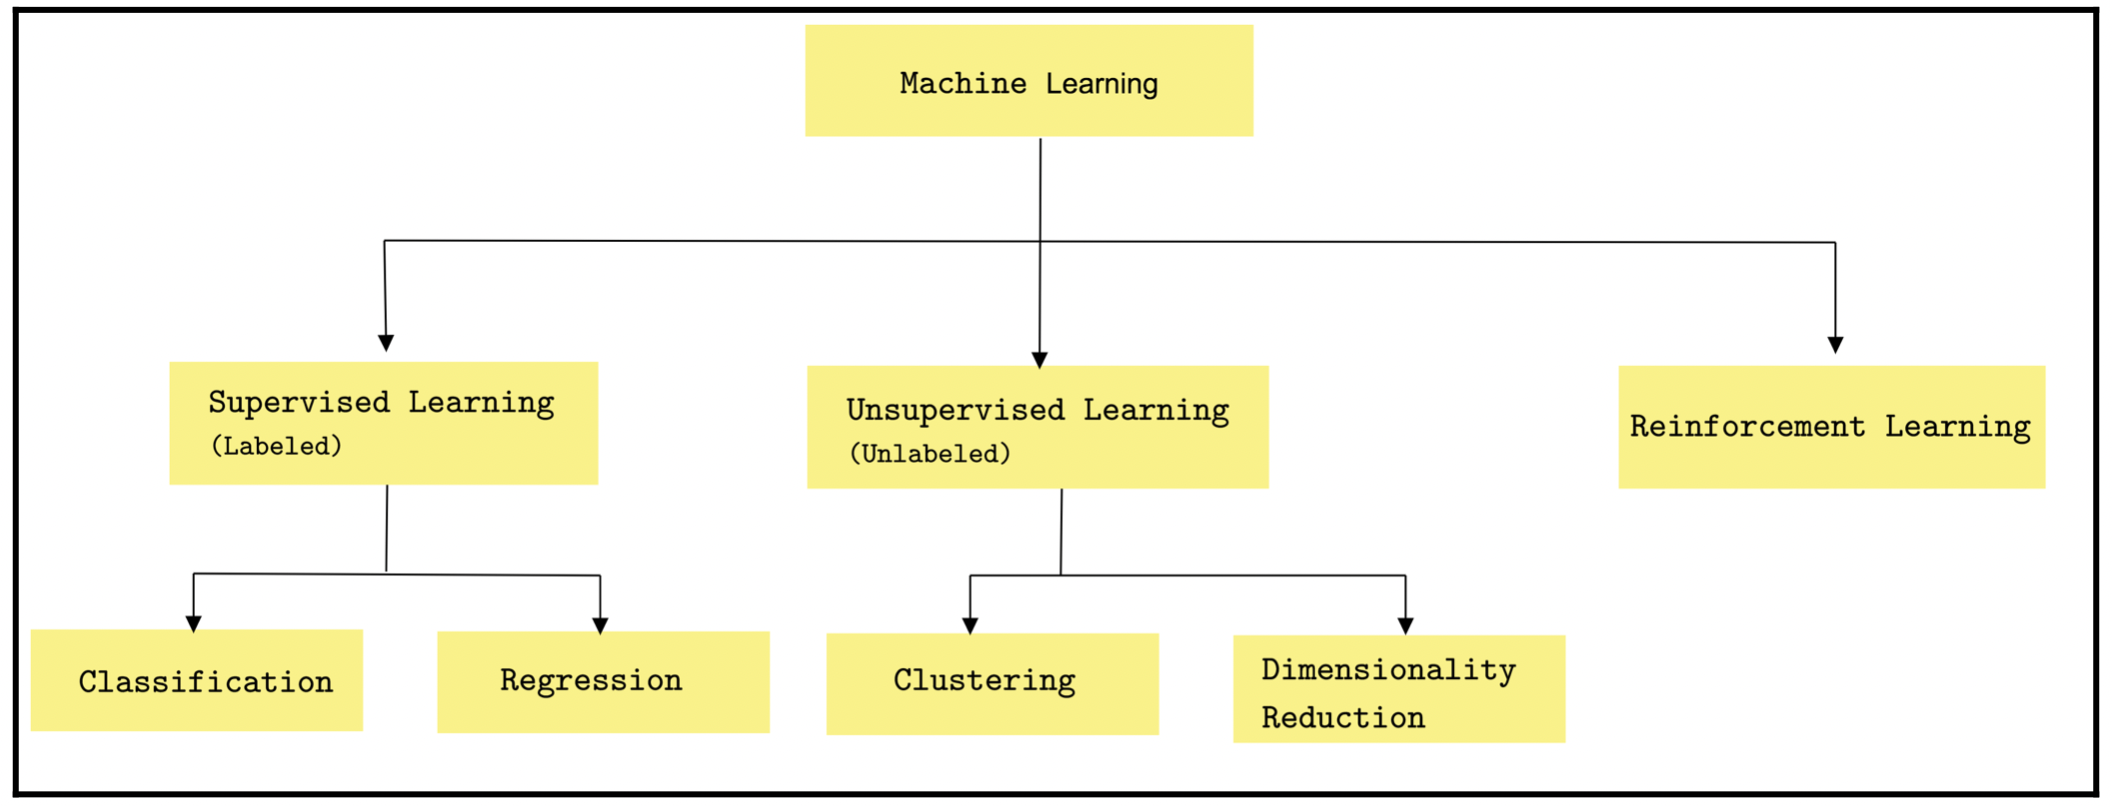

As shown in the preceding diagram, there are three different categories of ML algorithms:
* Supervised learning 
* Unsupervised learning 
* Reinforcement learning

##Supervised Learning
The primary objective of supervised learning is to generalize a model from **labeled training data**. Once a model has been trained, it allows users to make predictions about unseen future data. Here, by labeled training data, we mean the training examples know the associated output labels. Hence, it is referred to as supervised learning. The learning process can be thought of as a teacher supervising the entire process. In such a learning process, we know the correct answer initially, and the students learn enough iteratively over time and try to answer unseen questions. The errors in the answers are corrected by the teacher. The process of learning stops when we can ensure the performance of the student has reached an acceptable level.

In supervised learning, we have input variables (xi) and output variables (Yi). With this, we can learn a function, f, as shown by the following equation:

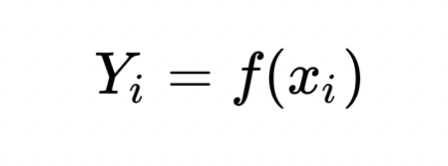

The objective is to learn a general mapping function, f, so that the function can predict the output variable, Y, for any new input data, x. Supervised learning algorithms can be categorized into two groups, as follows:
* Regression 
* Classification

###Regression
A regression problem has an output variable or dependent variable. This is a real value, such as weight, age, or any other real numbers. We already covered simple linear regression, multiple linear regression, and non-linear regression along with corelation topic so we will move on to classification.


###Classification
A classification problem has the output variable in the form of a category value; for example, red or white wines; young, adult, or old. For classification problems, there are different types of classification algorithms.
Some of the most popular ones are as follows:
* Linear classifier: Naive Bayes classifier, logistic regression, linear SVM 
* Nearest neighbor
* Decision tree classifier
* Support vector machines
* Random Forest classifier 
* Neural network classifiers 
* Boosted trees classifier

## Unsupervised learning
Unsupervised machine learning deals with **unlabeled data**. This type of learning can discover all kinds of unknown patterns in the data and can facilitate useful categorization. 

Consider a scenario where patients use an online web application to learn about a disease, learn about their symptoms, and manage their illness. Such web applications that provide psychoeducation about certain diseases are referred to as Internet-Delivered Treatments (IDT). Imagine several thousand patients accessing the website at different timestamps of the day, learning about their illness, and all their activities are being logged into our database. When we analyze these log files and plot them using a scatter plot, we find a large group of patients who are accessing the website in the afternoon and a large chunk accessing the website in the evening. Some other patients also follow random login patterns. 

This scenario illustrates two distinct clusters of patients: one active in the afternoon and one active in the evening. This typical scenario is an example of a clustering task.

There are several types of unsupervised learning algorithms that we can use. However, two major unsupervised learning tasks are **clustering and dimensionality reduction**. 

###Applications of unsupervised learning
There are several applications of unsupervised learning algorithms. Let's take a look at a few here:
* Clustering: These types of algorithms allow us to categorize the dataset into several similar groups, referred to as a cluster. Each cluster represents a group of similar points.
* Association mining: These types of unsupervised learning algorithms allow us to find frequently occurring items in our dataset.
* Anomaly detection: These types of unsupervised learning algorithms help us to determine unusual data points in any existing dataset.
* Dimensionality reduction: These techniques are commonly used in data processing in order to reduce the number of features in a dataset. This is one of the most important tasks to perform in unsupervised learning.

**Clustering using MiniBatch K-means**


We are going to use one of the unsupervised learning algorithms, that is, **clustering**. To be specific, we are going to cluster texts based on an algorithm named MiniBatch K-means clustering algorithm. Let's get some context regarding this.


Whenever a researcher starts working on any particular domain, they perform various literature reviews to comprehend the state of the art in any particular domain. Such a study is referred to as a review paper. When writing such review papers, you set up a set of search keywords and execute the search in many research paper indexing databases, such as scholar.google.com (https:/​/​scholar.​google.​com/​). After performing the search in several databases, you will have a list of relevant articles that you want to study. In this case, we have performed the search and the lists of relevant articles have been provided in the form of an Excel sheet. Note that each row in the Excel file contains some metadata about the related paper.

You can find out more about the MiniBatch K-means clustering algorithm by looking at the official documentation of the sklearn library: https:/​/ scikit-​learn.​org/​stable/​modules/​generated/​sklearn.​cluster. MiniBatchKMeans.​html.

1. Let's load the libraries & Excel file:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14, 7)

In [ ]:
df = pd.read_excel("https://drive.google.com/uc?id=1drYF0-s-RSU3g4BchqANpOgfbFWNy3q7")
    
#let's check the first 10 entries to understand what the data looks like:
df.head(10)

,Unnamed: 0,Abstract,Author,Doi,Journal,Title,Year
0,786,NaN,Rachel D. Williams,NaN,American Society for Information Science,“we’re not allowed”: public librarians’ perspe...,2016
1,885,NaN,Ghassan F. Bati,NaN,Association for Computing Machinery,“trust us”: mobile phone use patterns can pred...,2018
2,1083,NaN,Alex Leavitt,NaN,Association for Computing Machinery,“this is a throwaway account”: temporary techn...,2015
3,1004,NaN,Yngve Dahl,NaN,Association for Computing Machinery,“there are no secrets here!”: professional sta...,2012
4,899,NaN,Max Van Kleek,NaN,Association for Computing Machinery,“the crowd keeps me in shape”: social psycholo...,2013
5,1282,NaN,Tawfiq Ammari,NaN,Association for Computing Machinery,“thanks for your interest in our facebook grou...,2016
6,434,NaN,Kathleen O’Leary,NaN,Association for Computing Machinery,"“suddenly, we got to become therapists for eac...",2018
7,1168,NaN,Cara Wilson,NaN,Association for Computing Machinery,“put yourself in the picture”: designing for f...,2016
8,1238,NaN,Sarah Martindale,NaN,Association for Computing Machinery,“proof in the pudding”: designing iot plants t...,2017
9,1272,NaN,Margaret C. Jack,NaN,Association for Computing Machinery,"“privacy is not a concept, but a way of dealin...",2019


Import libraries and let's learn how to extract the keywords:

In [ ]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df.Title)
text = tfidf.transform(df.Title)

In [ ]:
text

<2958x1051 sparse matrix of type '<class 'numpy.float64'>'
	with 21961 stored elements in Compressed Sparse Row format>

In the preceding code, we are converting the title into TF-IDF features. We are removing the stop words from the title.

If you understood the concept of clustering, you probably already understand one of the biggest challenges surrounding the clustering; that is, determining how many clusters there are is optimal. There are some algorithms that can help us in determining the best number of clusters. One such algorithm is the elbow method (https:/​/​www.​scikit-​yb.​org/​en/ latest/​api/​cluster/​elbow.​html).

Let's create a function that takes the text and the maximum number of clusters and plot them on a graph. The code for doing so is as follows:

Fitting 2 clusters
Fitting 4 clusters
Fitting 6 clusters
Fitting 8 clusters
Fitting 10 clusters
Fitting 12 clusters
Fitting 14 clusters
Fitting 16 clusters
Fitting 18 clusters
Fitting 20 clusters


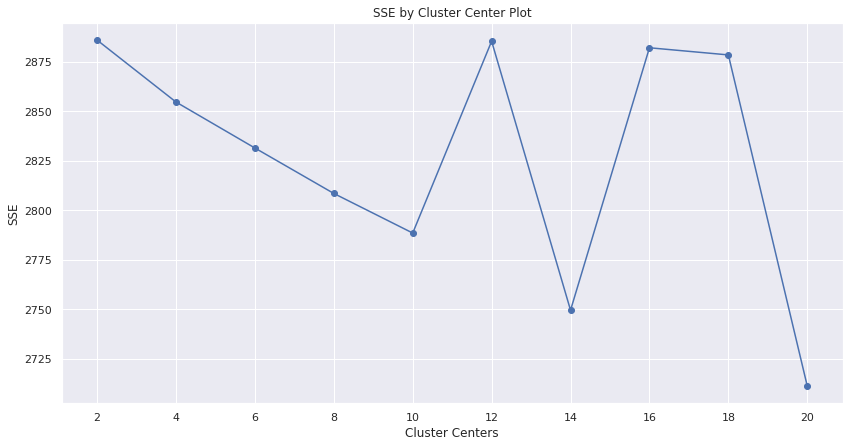

In [ ]:
def generate_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fitting {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
generate_optimal_clusters(text, 20)

Note the following points regarding the preceding function:
It takes two arguments, the text and the maximum number of clusters. In this case, we assume that the maximum number of clusters is 20.
Next, inside the function, we call the fit() method on the MiniBatchKMeans cluster for a range from 2, to the maximum number of clusters allowed (2 to 20). For each cluster, we calculate the sum of squared error (SSE) plot on the graph.

As shown in the preceding plot, the elbow changes at 4. According to the elbow theory, the plot creates an elbow at the optimal cluster number. Hence, the best cluster, in this case, is 4.

**Plotting clusters**


Now, let's plot the clusters on the graph. We will start plotting using **Principal Component Analysis (PCA)** since it is good at capturing the global structure of the data. Then, we will use **t-Distributed Stochastic Neighbor Embedding (TSNE)** to plot the graph as it is good at capturing the relationship with the neighbors. 

In [ ]:
#Start by creating the model again
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

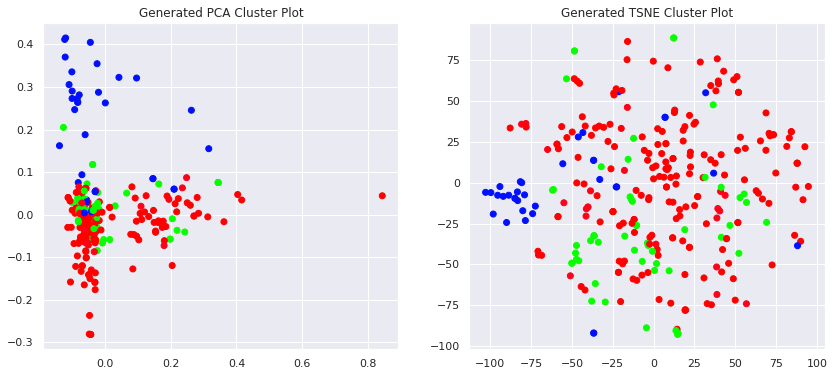

In [ ]:
"""
Let's plot both graphs. First, we will plot using the PCA technique and
then using the TSNE technique. 
Use the following code to do so:
"""

max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)
pca = PCA(n_components=2).fit_transform(text[max_items,:].todense())
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))

idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')



Each color represents one kind of cluster. In the preceding code, we sampled down the features to capture just 3,000 documents for faster processing and plotted them using a scatter plot. For PCA, we reduced the dimensions to 50.


Note that it is very difficult to find out which keywords were found in each type of cluster. To visualize this better, we need to plot the word cloud from each cluster.


###Word cloud
In order to see the top few keywords that belong to each cluster, we need to create a function that provides us with the top 50 words from each of the clusters and plot the word cloud.

Check the function, as follows:

Cluster 0 

bipolar,patient,framework,evaluation,risk,older,internet,healthcare,activity,approach,online,anxiety,research,digital,children,assessment,clinical,dementia,adaptive,cognitive,intervention,disorders,technology,learning,psychiatric,community,interventions,management,therapy,review,adults,use,support,designing,schizophrenia,stress,data,people,analysis,care,self,mobile,disorder,using,patients,design,study,treatment,based,depression
Cluster 1 

cessation,brief,comparing,single,disorder,people,adults,symptoms,risk,clinical,women,prevention,reduce,improve,training,use,results,online,personalized,internet,cluster,alcohol,anxiety,feedback,efficacy,patients,health,mental,therapy,primary,help,self,program,care,effects,cognitive,pilot,treatment,depression,tailored,effectiveness,web,based,randomised,study,intervention,protocol,randomized,controlled,trial
Cluster 2 

qualitative,physical,digital,implementation,self,medical,management,patient,adults,designing,life,quality,work,development

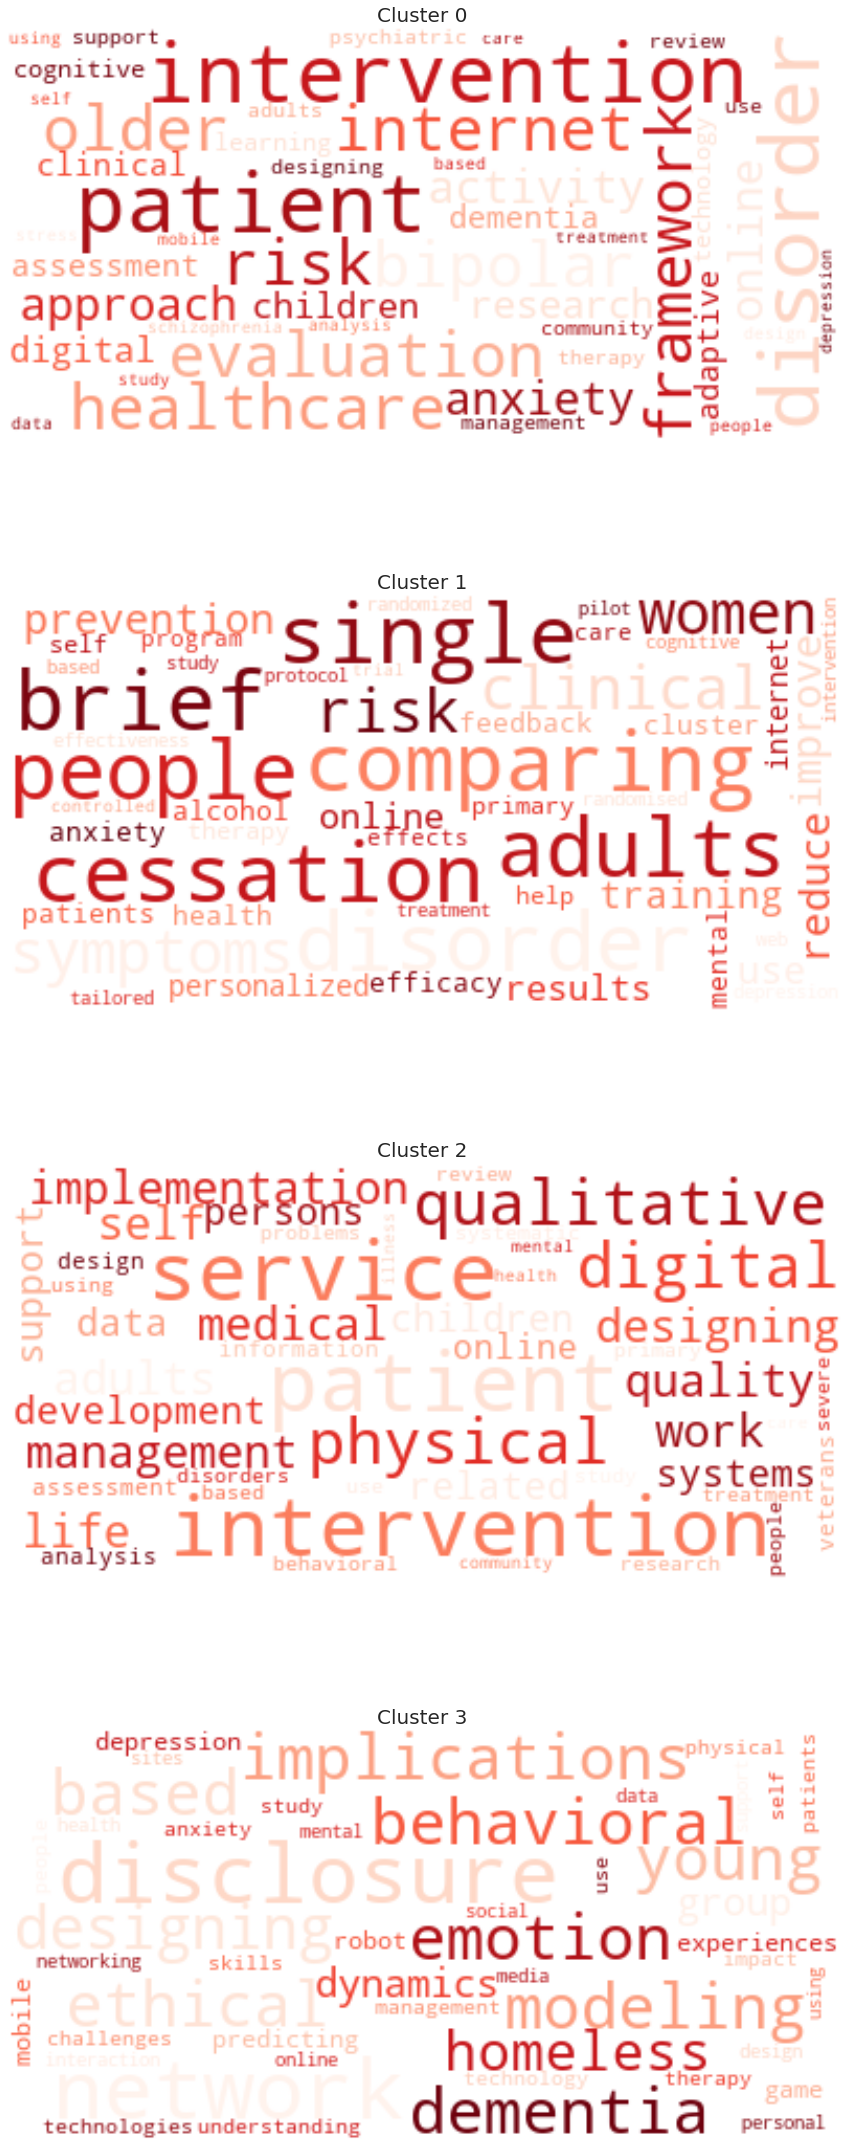

In [ ]:
from wordcloud import WordCloud 

fig, ax = plt.subplots(4, sharex=True, figsize=(15,10*4))

plt.rcParams["axes.grid"] = False

def high_frequency_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
      words = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
      print('Cluster {} \n'.format(i))
      print(words)
      wordcloud = WordCloud(max_font_size=40, collocations=False, colormap = 'Reds', background_color = 'white').generate(words)
      ax[i].imshow(wordcloud, interpolation='bilinear')
      ax[i].set_title('Cluster {} '.format(i), fontsize = 20)  
      ax[i].axis('off')     
high_frequency_keywords(text, clusters, tfidf.get_feature_names(), 50)

It printed four different clusters and 50 frequently occurring words in each cluster. It is easy to see the keywords that belong to each of the clusters and decide if clustering was done correctly or not.


As we can see, there are four clusters. Each cluster shows the most related word. For example, cluster 0 shows a lot of words related to healthcare, intervention, framework, digital health, and so on. By doing this, it is easier to see the relationship between the keywords.


##Reinforcement Learning
In reinforcement learning, an agent changes its states to maximize its goals. There are four distinct concepts here: agent, state, action, and reward. Let's take a look at these in more detail:
* Agent: This is the program we train. It chooses actions over time from its action space within the environment for a specified task.
* State: This is the observation that's received by the agent from its environment and represents the agent's current situation.
* Action: This is a choice that's made by an agent from its action space. The action changes the state of the agent.
* Reward: This is the resultant feedback regarding the agent's action and describes how the agent ought to behave.


Each of these concepts has been illustrated in the following diagram:

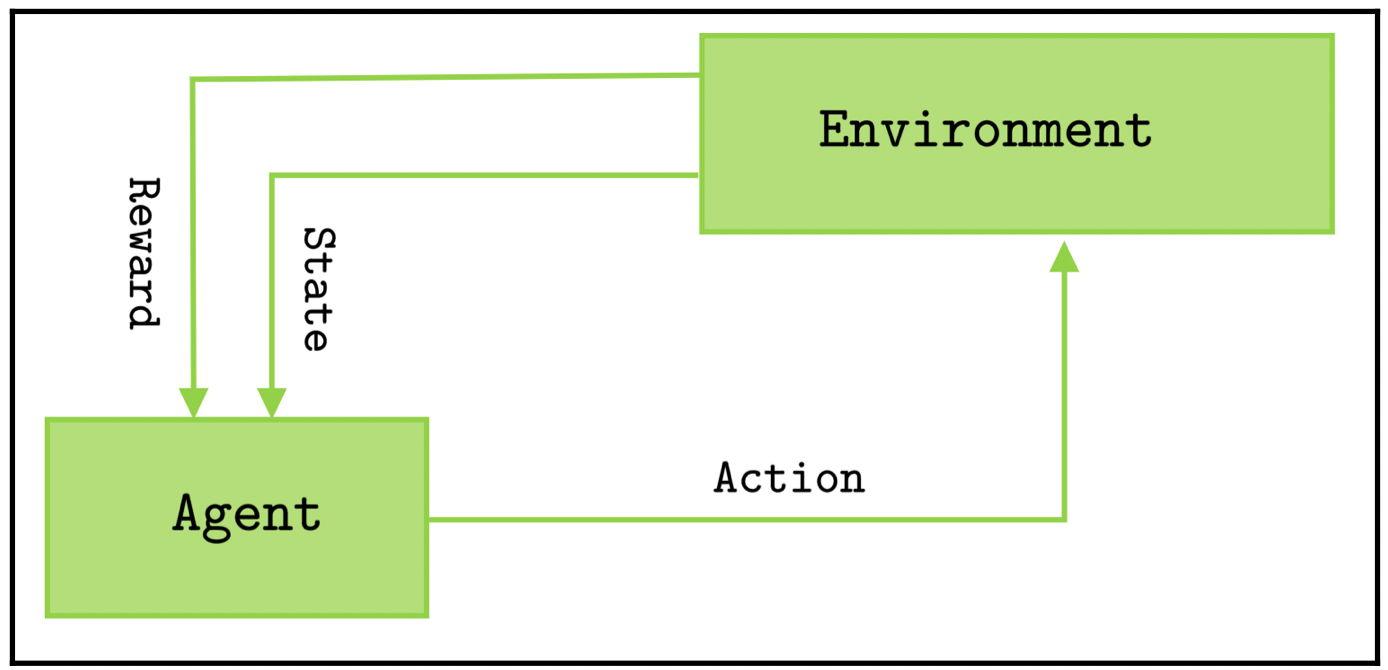

As shown in the preceding diagram, reinforcement learning involves an agent, an environment, a set of actions, a set of states, and a reward system. The agent interacts with the environment and modifies its state. Based on this modification, it gets rewards or penalties for its input. The goal of the agent is to maximize the reward over time.

###Applications of reinforcement learning
There are several use cases of RL algorithms.
Some of the most essential use cases are as follows:
* Text mining: Several researchers and companies have started to use the RL- based text generation model to produce highly readable text summaries from long text.
* Robotics: Several deep RL-based algorithms are used in the field of robotics engineering to enhance the performance of robotics based on the reward system.
* Healthcare: Several studies show that RL can be used in healthcare to optimize medication dosage and treatment policies.
* Trading: Several RL-based models are used in trading businesses to optimize trading outcomes.